<a href="https://colab.research.google.com/github/baveet256/Pytorch-DL/blob/main/Pytorch_5(CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None 
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None 
)

In [ ]:
len(train_data.classes)

10

In [ ]:
#printing the dataset randomly

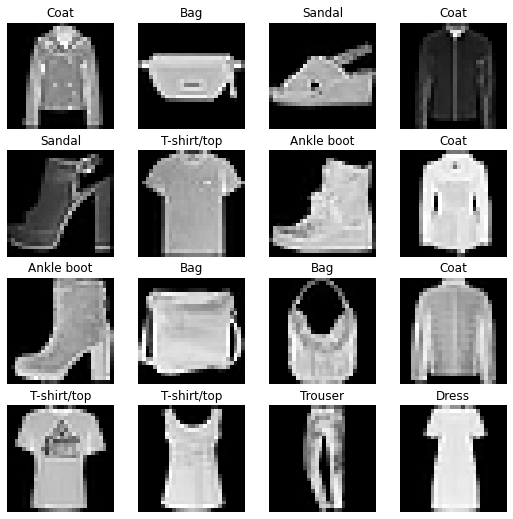

In [ ]:
x,y = 4,4
fig = plt.figure(figsize=(9,9))
for i in range(1,x*y+1):
  intrand = torch.randint(low=0, high=len(train_data),size = [1]).item()
  img,label = train_data[intrand]
  fig.add_subplot(x,y,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

In [ ]:
torch.randint(15, (2, 2))

tensor([[ 1,  4],
        [ 4, 10]])

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 32
#turning them to batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f1794e8dcd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1794e56050>)

In [ ]:
class Fashionmodel(nn.Module):
  def __init__(self,input_shape:int,hidden_shape:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,out_features = hidden_shape),
      nn.Linear(in_features=hidden_shape,out_features = hidden_shape)
    )
  def forward(self,x:torch.tensor):
    return self.layer_stack(x)
      

In [ ]:
torch.manual_seed(42)
modelf = Fashionmodel(input_shape=784,hidden_shape=10,output_shape=len(train_data.classes)).to('cpu') 
modelf

Fashionmodel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
t = torch.randn([1,1,3,3])
t=t.squeeze()
t.shape
t

tensor([[-1.1129, -2.3861, -0.1166],
        [ 0.0799,  0.5987, -0.9268],
        [-0.4852,  1.5203,  0.4791]])

In [ ]:
modelf.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
#downloading the helper functions
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('skipping')
else:
  req = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
with open('helper_functions.py','wb') as f:
  f.write(req.content)

In [ ]:
from helper_functions import accuracy_fn
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [ ]:
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelf.parameters(),lr=0.1)

In [ ]:
##timer calculation   
from timeit import default_timer as timer

In [ ]:

def train_time(start: float,end: float,device:torch.device = None):
  tot_time = end - start
  print(f"time taken:{tot_time:.3f} seconds , on device:{device}")
  return tot_time


In [ ]:
#measuring the time 
strt = timer()
en = timer()
train_time(start=strt,end=en,device='cpu')

time taken:0.000 seconds , on device:cpu


3.438900012042723e-05

In [ ]:
#start looping

In [ ]:
len(train_dataloader)

1875

Progress Bars

TQDM

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_timer = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss=0
  for batch_number ,(X,y) in enumerate(train_dataloader):
    modelf.train()
    y_pred = modelf(X)
    loss = loss_f(y_pred,y)
    # loss for every batches 
    train_loss+=loss 
    #optimitzer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_number % 375 == 0:
      print(f"current at {batch_number*len(X)}/{len(train_data)} samples completed")

  train_loss /= len(train_dataloader)

  #testing 
  test_loss=0
  test_acc=0
  modelf.eval()
  
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = modelf(X)
      test_loss += loss_f(test_pred,y)
      #y_pred would be logits and we have to present the labels and so  to get the maximum of all that ,
      # we will be using the argmax
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1)) 
    test_loss /=len(test_dataloader)
    test_acc  /=len(test_dataloader)            
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
#ending the time watch 
end_timer = timer()
total_time = train_time(start_timer,end_timer,device=str(next(modelf.parameters()).device))  


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
current at 0/60000 samples completed
current at 12000/60000 samples completed
current at 24000/60000 samples completed
current at 36000/60000 samples completed
current at 48000/60000 samples completed

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch:1
------
current at 0/60000 samples completed
current at 12000/60000 samples completed
current at 24000/60000 samples completed
current at 36000/60000 samples completed
current at 48000/60000 samples completed

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch:2
------
current at 0/60000 samples completed
current at 12000/60000 samples completed
current at 24000/60000 samples completed
current at 36000/60000 samples completed
current at 48000/60000 samples completed

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

time taken:20.145 seconds , on device:cpu


In [ ]:
str(next(modelf.parameters()).device)

'cpu'

Predictions

In [ ]:
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
   #return dictionary of results
  loss,acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      eval_pred = model(X)
      loss +=loss_fn(eval_pred,y) 
      acc  +=accuracy_fn(y,eval_pred.argmax(dim=1))
    loss /=len(data_loader)
    acc /=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}   

In [ ]:
modelf_results = eval_model(modelf,test_dataloader,loss_f,accuracy_fn)

In [ ]:
modelf_results

{'model_name': 'Fashionmodel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#Now onwards coding on the GPU, cnn too

In [ ]:
!nvidia-smi

Sat Oct 29 18:23:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
#Model non Linear coding

In [ ]:
class newFashionmodel(nn.Module):
  def __init__(self,input_feature:int,hidden_feature:int,output_feature:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
         nn.Linear(in_features = input_feature,out_features=hidden_feature),
         nn.ReLU(),
         nn.Linear(in_features = hidden_feature,out_features=output_feature),
         nn.ReLU())
  def forward(self,x):
    return self.layer_stack(x)  

In [ ]:
#creating the instance

In [ ]:
torch.manual_seed(42)
model_newf = newFashionmodel(784,128,10).to(device)
model_newf

newFashionmodel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_newf.parameters()).device

device(type='cuda', index=0)

In [ ]:
from pathlib import Path
import requests
req = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py') 

with open('helper_function.py','wb') as f:
  f.write(req.content)

In [ ]:
from helper_function import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_newf.parameters(),lr=0.1)


In [ ]:
len(train_dataloader)

1875

In [ ]:
## of Github 
# def train_step(model: torch.nn.Module,
#                data_loader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                accuracy_fn,
#                device: torch.device = device):
#     train_loss, train_acc = 0, 0
#     for batch, (X, y) in enumerate(data_loader):
#         # Send data to GPU
#         X, y = X.to(device), y.to(device)

#         # 1. Forward pass
#         y_pred = model(X)

#         # 2. Calculate loss
#         loss = loss_fn(y_pred, y)
#         train_loss += loss
#         train_acc += accuracy_fn(y_true=y,
#                                  y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

#         # 3. Optimizer zero grad
#         optimizer.zero_grad()

#         # 4. Loss backward
#         loss.backward()

#         # 5. Optimizer step
#         optimizer.step()

#     # Calculate loss and accuracy per epoch and print out what's happening
#     train_loss /= len(data_loader)
#     train_acc /= len(data_loader)
#     print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

# def test_step(model: torch.nn.Module,
#               data_loader: torch.utils.data.DataLoader,          
#               loss_fn: torch.nn.Module,
#               accuracy_fn,
#               device: torch.device = device):
#     test_loss, test_acc = 0, 0
#     model.eval() # put model in eval mode
#     # Turn on inference context manager
#     with torch.inference_mode(): 
#         for X, y in data_loader:
#             # Send data to GPU
#             X, y = X.to(device), y.to(device)
            
#             # 1. Forward pass
#             test_pred = model(X)
            
#             # 2. Calculate loss and accuracy
#             test_loss += loss_fn(test_pred, y)
#             test_acc += accuracy_fn(y_true=y,
#                 y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
#             )
        
#         # Adjust metrics and print out
#         test_loss /= len(data_loader)
#         test_acc /= len(data_loader)
#         print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:

def train_step(model:nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc =0,0
  #model.train()
  for batch_number ,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    # loss for every batches  
    train_loss+=loss
    train_acc +=accuracy_fn(y,y_pred.argmax(dim=1))  
    #optimitzer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    

In [ ]:

def test_step(model:nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               accuracy_fn,
               device:torch.device=device):
  model.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)
      test_pred = model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y,test_pred.argmax(dim=1))
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"\nTest loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")      


In [ ]:
#functions ready 
device

'cuda'

In [ ]:
from timeit import default_timer as timer

In [ ]:
def train_time(start: float,end: float,device:torch.device = None):
  tot_time = end - start
  print(f"time taken:{tot_time:.3f} seconds , on device:{device}")
  return tot_time


In [ ]:
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)
start_time=timer()
epochs = 3
for epoch in tqdm(range(epochs)):
   print(f"Epoch: {epoch}\n---------")
   train_step(model_newf,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
   test_step(model_newf,test_dataloader,loss_fn,accuracy_fn,device)
end_time = timer()
train_time(start_time,end_time,device)   

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.69011 | Train accuracy: 76.99%

Test loss: 0.46069, Test acc: 83.59%

Epoch: 1
---------
Train loss: 0.41669 | Train accuracy: 84.86%

Test loss: 0.42261, Test acc: 84.81%

Epoch: 2
---------
Train loss: 0.37521 | Train accuracy: 86.41%

Test loss: 0.38674, Test acc: 86.29%

time taken:25.687 seconds , on device:cuda


25.68651402599994

In [ ]:
modelf_results

{'model_name': 'Fashionmodel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
   #return dictionary of results
  loss,acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)
      eval_pred = model(X)
      loss +=loss_fn(eval_pred,y) 
      acc  +=accuracy_fn(y,eval_pred.argmax(dim=1))
    loss /=len(data_loader)
    acc /=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}   
#model_newf_results = eval_model(model_newf,test_dataloader,loss_f,accuracy_fn)

In [ ]:
model_newf_results


{'model_name': 'newFashionmodel',
 'model_loss': 0.38674044609069824,
 'model_acc': 86.29193290734824}

##Convolution Layers

In [ ]:
class newFashionmodel2(nn.Module):
  def __init__(self,input_channels:int,hidden_channels:int,out_channel:int):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Conv2d(in_channels=input_channels,out_channels=hidden_channels, kernel_size = 3, padding =1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_channels,out_channels=hidden_channels, kernel_size = 3, padding =1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.layer_stack2 = nn.Sequential(
        nn.Conv2d(hidden_channels,hidden_channels,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_channels,hidden_channels,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_channels*7*7 ,out_features=out_channel)
    )
  def forward(self,x):
    x = self.layer_stack1(x)
    #print(x.shape)
    x = self.layer_stack2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x 

In [ ]:
len(train_data.classes)

10

In [ ]:
img=0
for X,y in train_dataloader:
  img = X[0,:,:,:]
  break

In [ ]:
torch.manual_seed(42)
model_conv = newFashionmodel2(1,hidden_channels=10,out_channel = len(train_data.classes)).to(device)
model_conv

newFashionmodel2(
  (layer_stack1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_stack2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
img=0
for X,y in train_dataloader:
  img = X[0,:,:,:]
  break
print(img.shape)


torch.Size([1, 28, 28])


In [ ]:
test_img = img.unsqueeze(dim=1).to(device)
test_img.shape

torch.Size([1, 1, 28, 28])

In [ ]:
#entering the data to the layer
model_conv(test_img)

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0262, -0.0656,  0.0530, -0.0337, -0.0162,  0.0145, -0.0038, -0.0110,
          0.0231,  0.0142]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
#print in betweeen the layers to debug the scenario,
# probably matrix multiplication is the error
# so , adjust in between out and in channels/features

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_conv.parameters(),lr=0.1)

In [ ]:
epochs = 3
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model_conv,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(model_conv,train_dataloader,loss_fn,accuracy_fn,device)
end_time = timer()
train_time(start_time,end_time,device)   

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.57922 | Train accuracy: 79.02%

Test loss: 0.36549, Test acc: 86.56%

Epoch: 1
---------
Train loss: 0.35709 | Train accuracy: 87.09%

Test loss: 0.35328, Test acc: 87.22%

Epoch: 2
---------
Train loss: 0.31815 | Train accuracy: 88.57%

Test loss: 0.29032, Test acc: 89.62%

time taken:47.280 seconds , on device:cuda


47.27971776100003

In [ ]:
model_conv_results = eval_model(model_conv,test_dataloader,loss_fn,accuracy_fn)
model_conv_results

{'model_name': 'newFashionmodel2',
 'model_loss': 0.3232790231704712,
 'model_acc': 88.58825878594249}

In [ ]:
# now some predictions 
## GITHUB , i am bored for now.
## That's 80 precent done , now for now , cover it from git.